In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import model_selection
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sn
from pandas.plotting import scatter_matrix

In [2]:
heart_df = pd.read_csv("Resources/dummie_data.csv")
heart_df.head()

,Unnamed: 0,thallium normal,ST depression,Max HR,non-anginal pain,Number of vessels fluro,Sex,asymptomatic,ST upsloaping,atypical angina,Exercise angina,EKG results
0,0,1,2.4,109,0,3,1,1,0,0,0,2
1,1,0,1.6,160,1,0,0,0,0,0,0,2
2,2,0,0.3,141,0,0,1,0,1,1,0,0
3,3,0,0.2,105,0,1,1,1,0,0,1,0
4,4,1,0.2,121,0,1,0,0,1,1,1,2


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               270 non-null    int64  
 1   thallium normal          270 non-null    int64  
 2   ST depression            270 non-null    float64
 3   Max HR                   270 non-null    int64  
 4   non-anginal pain         270 non-null    int64  
 5   Number of vessels fluro  270 non-null    int64  
 6   Sex                      270 non-null    int64  
 7   asymptomatic             270 non-null    int64  
 8   ST upsloaping            270 non-null    int64  
 9   atypical angina          270 non-null    int64  
 10  Exercise angina          270 non-null    int64  
 11  EKG results              270 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 25.4 KB


In [4]:
# Determine the number of unique values in each column.
heart_df.nunique()

Unnamed: 0                 270
thallium normal              2
ST depression               39
Max HR                      90
non-anginal pain             2
Number of vessels fluro      4
Sex                          2
asymptomatic                 2
ST upsloaping                2
atypical angina              2
Exercise angina              2
EKG results                  3
dtype: int64

In [5]:
# Split our preprocessed data into our features and target arrays
y = heart_df["atypical angina"]
X = heart_df.drop(["atypical angina"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes1=10
hidden_nodes2=5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation='relu'))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [8]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 1.0519 - accuracy: 0.3861
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9922 - accuracy: 0.3911
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.4208
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.4307
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8437 - accuracy: 0.4554
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.4653
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.4901
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7356 - accuracy: 0.4950
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.5149
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5545
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9604
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9604
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9604
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9653
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9653
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1546 - accuracy: 0.9653
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9604
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9604
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9604
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9604
Epoch 94/100
7/7 [===============

In [10]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.2283 - accuracy: 0.9265 - 175ms/epoch - 58ms/step
Loss: 0.22825859487056732, Accuracy: 0.9264705777168274


<AxesSubplot:title={'center':'Accuracy ( Atypical angina First Attempt)'}>

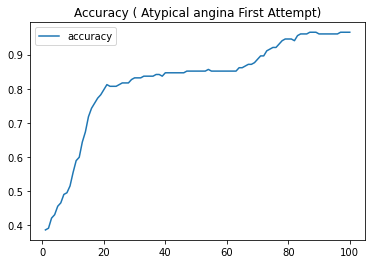

In [11]:
heart_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
heart_df.plot(y="accuracy", title="Accuracy ( Atypical angina First Attempt)")

In [12]:
# Export our model to HDF5 file
nn.save('H5/Heart_Disease_Optimization_Atypical.h5')